In [13]:
import pandas as pd
import numpy as np
import pylab as plt
import math
import json
import re
import scipy.sparse as sp
from IPython.display import display
from sklearn import preprocessing
from sklearn.feature_extraction.text import *
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import TruncatedSVD 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier


%matplotlib inline

RAND = 120

In [14]:
def load_json(name):
    with open(name, 'r') as file:
        _params = json.loads(file.read())
    return pd.DataFrame(_params)

train_data_real = load_json('train.json')
test_data_real = load_json('test.json')

display(train_data_real.describe())
display(test_data_real.describe())

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,requester_number_of_comments_in_raop_at_request,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03,4.040000e+03,4.040000e+03
mean,2.424505,6.180446,2.871040,254.586579,757.692720,16.417034,518.993205,115.098267,289.425743,0.645050,...,41.151733,0.063614,1.239109,18.076733,1160.079950,2720.342079,3.743236e+03,7.788069e+03,1.342829e+09,1.342826e+09
std,3.023101,10.746320,4.723339,303.275730,333.035728,70.651428,267.872623,193.318968,357.416133,3.413813,...,80.798543,0.325773,0.603083,21.736465,3718.365515,6264.378878,2.583816e+04,3.916741e+04,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000,0.000000,45.291562,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-173.000000,-173.000000,0.000000e+00,0.000000e+00,1.297723e+09,1.297723e+09
25%,1.000000,2.000000,0.000000,3.473168,522.248455,0.000000,279.009051,0.000000,8.000000,0.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,22.000000,9.000000e+00,5.200000e+01,1.320469e+09,1.320466e+09
50%,2.000000,4.000000,1.000000,157.067170,753.270874,0.000000,528.781939,24.000000,114.000000,0.000000,...,13.000000,0.000000,1.000000,11.000000,174.500000,708.000000,3.510000e+02,1.283500e+03,1.342565e+09,1.342561e+09
75%,3.000000,7.000000,4.000000,390.092653,900.349838,0.000000,776.226670,140.250000,479.000000,0.000000,...,46.000000,0.000000,1.000000,27.000000,1163.750000,3304.000000,2.303750e+03,6.829000e+03,1.364618e+09,1.364614e+09
max,47.000000,345.000000,61.000000,2809.750787,2879.276319,785.457685,1025.407593,994.000000,1000.000000,88.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1.286864e+06,2.046482e+06,1.381552e+09,1.381523e+09


,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1.631000e+03,1.631000e+03
mean,248.740587,16.952355,118.348866,0.508277,20.737584,0.044145,17.705089,1173.031269,3647.324341,1.342839e+09,1.342836e+09
std,301.061395,69.884387,202.692191,2.207021,48.458101,0.269994,22.146129,2830.768038,12105.153193,2.303090e+07,2.303028e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-69.000000,0.000000,1.302231e+09,1.302227e+09
25%,3.729450,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,9.000000,1.320654e+09,1.320654e+09
50%,147.672697,0.000000,22.000000,0.000000,4.000000,0.000000,10.000000,163.000000,309.000000,1.343327e+09,1.343323e+09
75%,378.706916,0.000000,138.000000,0.000000,21.000000,0.000000,27.000000,1143.500000,2246.000000,1.363822e+09,1.363819e+09
max,2235.245868,709.481435,996.000000,38.000000,734.000000,5.000000,235.000000,55318.000000,177392.000000,1.381570e+09,1.381541e+09


In [15]:
display(train_data_real.loc[0])
display(test_data_real.loc[0])

giver_username_if_known                                                                               N/A
number_of_downvotes_of_request_at_retrieval                                                             0
number_of_upvotes_of_request_at_retrieval                                                               1
post_was_edited                                                                                     False
request_id                                                                                       t3_l25d7
request_number_of_comments_at_retrieval                                                                 0
request_text                                            Hi I am in need of food for my 4 children we a...
request_text_edit_aware                                 Hi I am in need of food for my 4 children we a...
request_title                                                     Request Colorado Springs Help Us Please
requester_account_age_in_days_at_request      

giver_username_if_known                                                                             N/A
request_id                                                                                     t3_i8iy4
request_text_edit_aware                               Hey all! It's about 95 degrees here and our ki...
request_title                                         [request] pregger gf 95 degree house and no fo...
requester_account_age_in_days_at_request                                                        42.0839
requester_days_since_first_post_on_raop_at_request                                                    0
requester_number_of_comments_at_request                                                              57
requester_number_of_comments_in_raop_at_request                                                       0
requester_number_of_posts_at_request                                                                 10
requester_number_of_posts_on_raop_at_request                    

In [16]:
print('Positive answer =', len(train_data_real[train_data_real['requester_received_pizza'] == True]))
print('Negative answer =', len(train_data_real[train_data_real['requester_received_pizza'] == False]))

Positive answer = 994
Negative answer = 3046


In [17]:
columns_text = [
    'request_text_edit_aware',
    'request_title'
]

columns_result = [
    'requester_received_pizza'
]

def get_X(data, int_transfom, text_trasform, transform=None, train=True):
    _int_X = data.select_dtypes(exclude=[object])
    _text_X = data.select_dtypes(include=[object])
    _text_X = np.array(_text_X['request_text_edit_aware'] + ' ' + _text_X['request_title'])

    if train:
        _int_X = int_transfom.fit_transform(_int_X)
        _text_X = text_trasform.fit_transform(_text_X)
    else:
        _int_X = int_transfom.transform(_int_X)
        _text_X = text_trasform.transform(_text_X)
        
    temp = sp.hstack((sp.csr_matrix(_int_X), _text_X))
    if transform is None:
        return temp
    return transform.fit_transform(temp) if train else transform.transform(temp)

def get_answer_array(data):
    _y = data[columns_result].applymap(int)
    _y = np.array(_y).astype(int).ravel()
    return _y

# Генерация признаков

In [18]:
features = [
    'text_length',
    'titel_length',
    'number_of_sub',
    'number_of_sub_is_zero',
    'new_account',
    'comment_rate',
    'weekend',
    'morning',
    'afternoon',
    'night',
    'evening',
    
    'request_text_edit_aware',    
    'request_title',
    'requester_upvotes_minus_downvotes_at_request',
    'requester_upvotes_plus_downvotes_at_request',
    'requester_account_age_in_days_at_request',
    'requester_days_since_first_post_on_raop_at_request',
    'requester_number_of_comments_at_request',
    'requester_number_of_comments_in_raop_at_request',
    'requester_number_of_posts_at_request',
    'requester_number_of_posts_on_raop_at_request',
    'requester_number_of_subreddits_at_request'
    
]

def generate_features(frame):
    frame['text_length'] = frame['request_text_edit_aware'].str.len()
    frame['titel_length'] = frame['request_title'].str.len()
    frame['text_length_is_small'] = frame['text_length'] < 100
    frame['text_length_is_small'] = frame['text_length_is_small'].astype(int)
    frame['titel_length_is_small'] = frame['titel_length'] < 30
    frame['titel_length_is_small'] = frame['titel_length_is_small'].astype(int)
    
    frame['number_of_sub'] = frame['requester_subreddits_at_request'].map(lambda x: len(x))
    frame['number_of_sub_is_zero'] = frame['number_of_sub'] == 0
    frame['number_of_sub_is_zero'] = frame['number_of_sub_is_zero'].astype(int)
    
    frame['new_account'] = frame['requester_account_age_in_days_at_request'] < 3
    frame['new_account'] = frame['new_account'].astype(int)
    
    frame['comment_rate'] = frame['requester_number_of_comments_at_request'] / \
        (1 + frame['requester_number_of_comments_in_raop_at_request'])
    
    date = pd.to_datetime(frame['unix_timestamp_of_request_utc'], unit = 's')
    
    weekday = pd.DatetimeIndex(date).weekday
    
    frame = pd.concat([frame, pd.get_dummies(weekday, prefix='day')], axis=1)
    
    frame['weekend'] = (weekday == 5) | (weekday == 6)
    frame['weekend'] = frame['weekend'].astype(int)
    
    hour = pd.DatetimeIndex(date).hour
    
    frame['morning'] = (6 < hour) & (hour < 12)
    frame['morning'] = frame['morning'].astype(int)
    
    frame['afternoon'] = (12 <= hour) & (hour <= 16)
    frame['afternoon'] = frame['afternoon'].astype(int)
    
    frame['night'] = (22 <= hour) | (hour <= 6)
    frame['night'] = frame['night'].astype(int)
    
    frame['evening'] = (16 < hour) & (hour < 22)
    frame['evening'] = frame['evening'].astype(int)
    
    return frame


def process_frame(frame):
    return frame[features]

train_data = process_frame(generate_features(train_data_real))
test_data = process_frame(generate_features(test_data_real))
display(train_data.head())

,text_length,titel_length,number_of_sub,number_of_sub_is_zero,new_account,comment_rate,weekend,morning,afternoon,night,...,request_title,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request
0,316,39,0,1,1,0.000000,0,0,0,0,...,Request Colorado Springs Help Us Please,0,0,0.000000,0.000000,0,0,0,0,0
1,74,57,12,0,0,0.000000,1,0,0,1,...,"[Request] California, No cash and I could use ...",34,116,501.111100,0.000000,0,0,15,0,12
2,277,66,0,1,1,0.000000,0,0,1,0,...,"[Request] Hungry couple in Dundee, Scotland wo...",0,0,0.000000,0.000000,0,0,0,0,0
3,172,69,4,0,0,36.000000,0,0,0,0,...,"[Request] In Canada (Ontario), just got home f...",54,76,6.518438,0.000000,36,0,1,0,4
4,490,81,11,0,0,46.666667,0,0,0,0,...,[Request] Old friend coming to visit. Would LO...,1121,1733,162.063252,101.606505,140,2,14,0,11


In [19]:
y = get_answer_array(train_data_real)
display(y)

array([0, 0, 0, ..., 0, 0, 0])

# Важность признаков

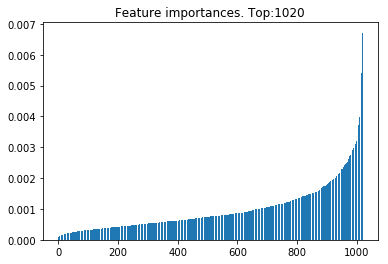

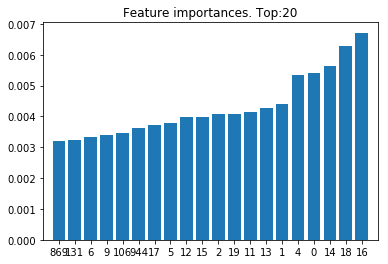

In [20]:
def importances(X, y, top=None):
    forest = ExtraTreesClassifier(n_estimators=200, random_state=RAND)
    forest.fit(X, y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)
    if top is not None:
        indices = indices[-top:]
    plt.figure()
    plt.title('Feature importances. Top:{}'.format(len(indices)))
    plt.bar(range(len(indices)), importances[indices])
    if top is not None:
        plt.xticks(range(top), indices)
        plt.xlim([-1, top])
    plt.show()

train_scaler = preprocessing.StandardScaler()
train_vectorize = TfidfVectorizer(max_features=1000, max_df=0.3)
X = get_X(train_data, train_scaler, train_vectorize)

importances(X, y)
importances(X, y, top=20)

# Преобразование данных

In [21]:
pca = TruncatedSVD(n_components=500)
X = get_X(train_data, train_scaler, train_vectorize, pca)

display(X.shape)
display(X)

(4040, 500)

array([[ -2.65990896e+00,   1.02320297e+00,  -1.94902310e+00, ...,
          2.31975061e-02,   3.01869938e-02,   1.81090966e-02],
       [ -2.84147355e-01,  -7.87002375e-01,   1.25544923e+00, ...,
         -6.12981879e-04,   2.78888753e-02,   2.70064225e-02],
       [ -2.61734161e+00,   8.11182962e-01,  -1.13566933e+00, ...,
         -1.25715775e-02,   2.72967044e-02,   1.08914245e-02],
       ..., 
       [  3.20214600e-01,  -1.85868727e-01,  -3.67337477e-01, ...,
         -1.66034241e-03,   1.44855043e-02,  -4.01635024e-02],
       [ -2.00681345e+00,   4.34988395e-01,  -6.57271999e-01, ...,
         -1.11941200e-02,  -1.81193826e-02,  -1.59159778e-02],
       [  2.71266142e+00,  -1.28086524e+00,   4.03995932e-01, ...,
          4.56471637e-02,   2.58386474e-03,  -2.76775356e-02]])

# Оптимизация гиперпараметров

'Score=0.6327393788918632, C=0.008'

'Score=0.6401420855164865, C=0.04'

'Score=0.6520239675740606, C=0.2'

'Score=0.6434587093347783, C=1.0'

'Score=0.6216311303956917, C=5.0'

'Score=0.6083970827179623, C=25.0'

'best_c=0.2, best_score=0.6520239675740606'

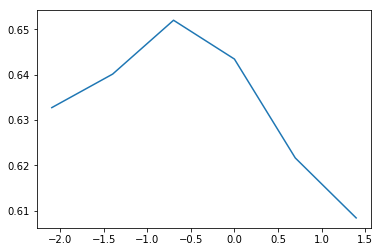

In [22]:
best_score = -np.inf
kfl = KFold(random_state=RAND, n_splits=5, shuffle=True)
scores = []
grid = np.power(5.0, np.arange(-3, 3))
for C in grid:
    lg = LogisticRegression(C=C)
    score = np.mean(cross_val_score(lg, X, y, cv=kfl, scoring='roc_auc'))
    display('Score={}, C={}'.format(score, C))
    if best_score < score:
        best_score = score
        best_c = C
    scores.append(score)
display('best_c={}, best_score={}'.format(best_c, best_score))
plt.plot(np.log10(grid), scores)

# Получение результата

In [23]:
lg = LogisticRegression(C=best_c)
lg.fit(X, y)
X_test = get_X(test_data, train_scaler, train_vectorize, pca, train=False)

In [24]:
id_test = test_data_real[['request_id']].copy()
y_test = [x[1] for x in lg.predict_proba(X_test)]
id_test['requester_received_pizza'] = y_test
id_test.to_csv('result.csv', index=False)
display(id_test.head())

,request_id,requester_received_pizza
0,t3_i8iy4,0.271209
1,t3_1mfqi0,0.345108
2,t3_lclka,0.197547
3,t3_1jdgdj,0.187651
4,t3_t2qt4,0.150023
